# Random Forest and XGBoost Hyperparameter Optimization

## Introduction

## Summary

### Key Findings

In [ ]:
from pathlib import Path
from datetime import datetime
import time
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
from sklearnex import patch_sklearn
patch_sklearn()
# from sklearn import metrics, svm, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, BayesianRidge
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from dmba import plotDecisionTree, classificationSummary, regressionSummary, exhaustive_search, adjusted_r2_score, AIC_score, BIC_score
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

## Scaling & Partioning Data
#### 80% test / 20% train

In [ ]:
data = Path('/Users/z/Library/Mobile Documents/com~apple~CloudDocs/DATA SCIENCE PROJECTS/Cars/Data Prep & Cleaning')

In [ ]:
cars_df = pd.read_csv(data / 'Car Data Cleaned.csv')

predictors = ['Year', 'Model', 'State', 'Mileage']

X = pd.get_dummies(cars_df[predictors], drop_first=False).values # one-hot encodes categorical columns
y = cars_df['Price'].values.reshape(-1,1)

column_names = pd.get_dummies(cars_df[predictors], drop_first=False) # fixes numpy array error

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=column_names.columns) #convert back to DataFrame to maintain column names / use x2 otherwise error 

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=1)

print('Data Processing Finished')

## Training Models

In [ ]:
# Random Forest Model
RF_model = RandomForestRegressor(n_jobs=-1)
RF_model.fit(X_train,y_train.ravel())

# XGBoost Model
XGBoost_model = xgb.XGBRegressor()
XGBoost_model.fit(X_train, y_train.ravel())

print('Training Models Finished')

# Optimizations

## Random Forest Optimization

In [87]:
start_time = time.time()
print('Start time:', datetime.fromtimestamp(start_time), '\n')

# Create the RandomizedSearchCV model
random_search = RandomizedSearchCV(RF_Model, param_distributions=parametersRF, n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error', random_state=1)
optimizedmodelRF = random_search.fit(X_train, y_train.ravel())

# Print the best hyperparameters
print("Tuned hyperparameters (best parameters):", optimizedmodelRF.best_params_)
print('\n')

# Predict the response for test dataset using the best model
y_pred_optimizedRF = optimizedmodelRF.predict(X_test)

# Calculate and print performance metrics
print("\033[1mOptimized Random Forest Performance:\033[0m")
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred_optimizedRF))
print("Mean Squared Error  (MSE): ", metrics.mean_squared_error(y_test, y_pred_optimizedRF))
print("R2 Score             (R2): ", metrics.r2_score(y_test, y_pred_optimizedRF))

end_time = time.time()
elapsed_time = (end_time - start_time) / 60
print('\n\n')
print(f"{elapsed_time:.1f} minutes to execute.")


Start time: 2024-07-22 02:39:32.618460 

Tuned hyperparameters (best parameters): {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Optimized Random Forest Performance:
Mean Absolute Error (MAE):  2697.2351045379046
Mean Squared Error  (MSE):  18986283.926480055
R2 Score             (R2):  0.8941373880015622



127.9 minutes to execute.


In [103]:
start_time = time.time()
print('Start time:', datetime.fromtimestamp(start_time), '\n')

# Create the RandomizedSearchCV model
random_search = RandomizedSearchCV(RF_Model, param_distributions=parametersRF_refined, n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error', random_state=1)
optimizedmodelRF = random_search.fit(X_train, y_train.ravel())

# Print the best hyperparameters
print("Tuned hyperparameters (best parameters):", optimizedmodelRF.best_params_)
print('\n')

# Predict the response for test dataset using the best model
y_pred_optimizedRF = optimizedmodelRF.predict(X_test)

# Calculate and print performance metrics
print("\033[1mOptimized 2 Random Forest Performance:\033[0m")
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred_optimizedRF))
print("Mean Squared Error  (MSE): ", metrics.mean_squared_error(y_test, y_pred_optimizedRF))
print("R2 Score             (R2): ", metrics.r2_score(y_test, y_pred_optimizedRF))

end_time = time.time()
elapsed_time = (end_time - start_time) / 60
print('\n\n')
print(f"{elapsed_time:.1f} minutes to execute.")


Start time: 2024-07-22 20:22:38.592674 

Tuned hyperparameters (best parameters): {'n_estimators': 350, 'min_samples_split': 40, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


Optimized 2 Random Forest Performance:
Mean Absolute Error (MAE):  2701.0521750319626
Mean Squared Error  (MSE):  18726927.468728308
R2 Score             (R2):  0.8955834925769799



131.7 minutes to execute.


Optimization XGBoost

In [53]:

start_time = time.time()
print('Start time:', datetime.fromtimestamp(start_time), '\n')

# Perform Grid Search with cross-validation
XG_random_search = RandomizedSearchCV(XGBoost_model, param_distributions=param_dist, n_iter=n_iter_XGB, cv=5, scoring='neg_mean_squared_error', random_state=1)
XG_rand_optimizedmodel = XG_random_search.fit(X_train, y_train.ravel())

# Print the best hyperparameters
print("Tuned hyperparameters (best parameters):", XG_rand_optimizedmodel.best_params_)
print('\n')

# Predict the response for the test dataset using the best model
y_pred_XG_rand_optimized = XG_rand_optimizedmodel.predict(X_test)

# print performance
print("\033[1mOptimized XGBoost Performance:\033[0m")
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred_XG_rand_optimized))
print("Mean Squared Error  (MSE): ", metrics.mean_squared_error(y_test, y_pred_XG_rand_optimized))
print("R2 Score             (R2): ", metrics.r2_score(y_test, y_pred_XG_rand_optimized))

end_time = time.time()
elapsed_time = (end_time - start_time) / 60
print('\n\n')
print(f"{elapsed_time:.1f} minutes to execute.")

Start time: 2024-07-22 00:55:38.686979 

Tuned hyperparameters (best parameters): {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}


Optimized XGBoost Performance:
Mean Absolute Error (MAE):  2692.164784876864
Mean Squared Error  (MSE):  18463254.625871092
R2 Score             (R2):  0.8970536642001372



8.5 minutes to execute.


In [54]:
start_time = time.time()
print('Start time:', datetime.fromtimestamp(start_time), '\n')

# Perform Grid Search with cross-validation
XG_random_search = RandomizedSearchCV(XGBoost_model, param_distributions=param_dist_refined, n_iter=n_iter_XGB, cv=5, scoring='neg_mean_squared_error', random_state=1)
XG_rand_optimizedmodel = XG_random_search.fit(X_train, y_train.ravel())

# Print the best hyperparameters
print("Tuned hyperparameters (best parameters):", XG_rand_optimizedmodel.best_params_)
print('\n')

# Predict the response for the test dataset using the best model
y_pred_XG_rand_optimized = XG_rand_optimizedmodel.predict(X_test)

# print performance
print("\033[1mOptimized 2 XGBoost Performance:\033[0m")
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred_XG_rand_optimized))
print("Mean Squared Error  (MSE): ", metrics.mean_squared_error(y_test, y_pred_XG_rand_optimized))
print("R2 Score             (R2): ", metrics.r2_score(y_test, y_pred_XG_rand_optimized))

end_time = time.time()
elapsed_time = (end_time - start_time) / 60
print('\n\n')
print(f"{elapsed_time:.1f} minutes to execute.")

Start time: 2024-07-22 01:04:07.657129 

Tuned hyperparameters (best parameters): {'subsample': 0.9, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 350, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.9}


Optimized 2 XGBoost Performance:
Mean Absolute Error (MAE):  2669.3917617262473
Mean Squared Error  (MSE):  18230690.174195256
R2 Score             (R2):  0.8983503834743103



12.9 minutes to execute.


# Plotting Optimized Models

In [ ]:
RF Model

/var/folders/m3/brcgwnys2cz7hsgh16p2fdqc0000gn/T/ipykernel_5714/1077354019.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_errors = Plot_df.groupby('Price Range')['Error'].mean()


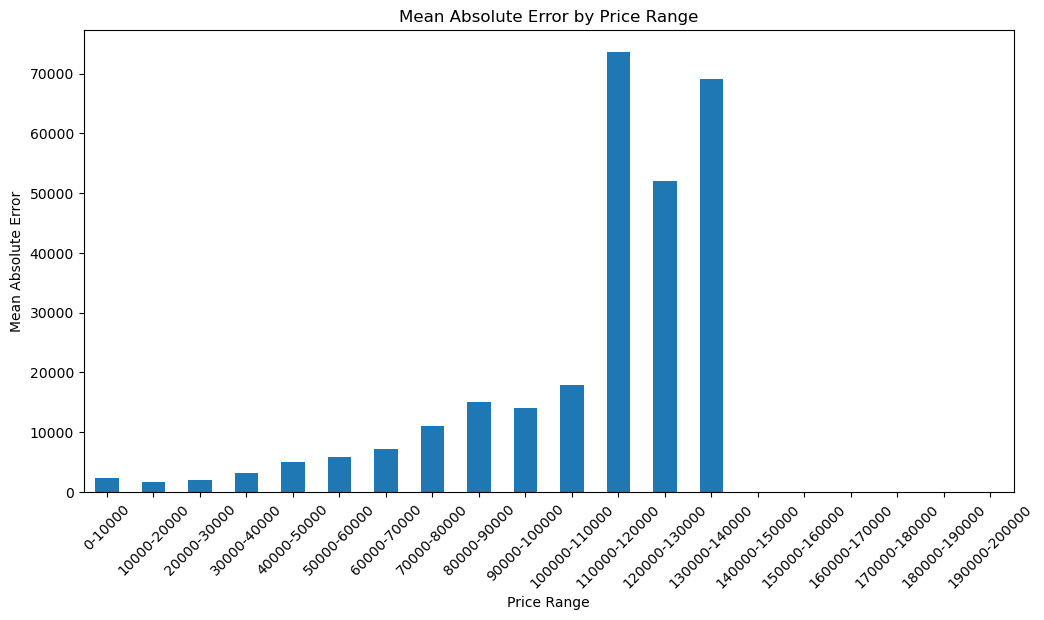

In [105]:
# Ensure y_test and errors are 1-dimensional
y_test = y_test.flatten()
errors = np.abs(y_test - y_pred_optimizedRF).flatten()

# Create a DataFrame with actual prices and errors
Plot_df = pd.DataFrame({'Price': y_test, 'Error': errors})

# Define price bins (e.g., each $10k)
price_bins = np.arange(0, 210000, 10000)
labels = [f'{int(bin)}-{int(bin+10000)}' for bin in price_bins[:-1]]

# Bin the prices
Plot_df['Price Range'] = pd.cut(Plot_df['Price'], bins=price_bins, labels=labels, include_lowest=True)

# Calculate the mean error for each price range
mean_errors = Plot_df.groupby('Price Range')['Error'].mean()

# Plot the mean error for each price range
plt.figure(figsize=(12, 6))
mean_errors.plot(kind='bar')
plt.xlabel('Price Range')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error by Price Range')
plt.xticks(rotation=45)
plt.show()


/var/folders/m3/brcgwnys2cz7hsgh16p2fdqc0000gn/T/ipykernel_5714/13799946.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_errors = Plot_df.groupby('Price Range')['Error'].mean()


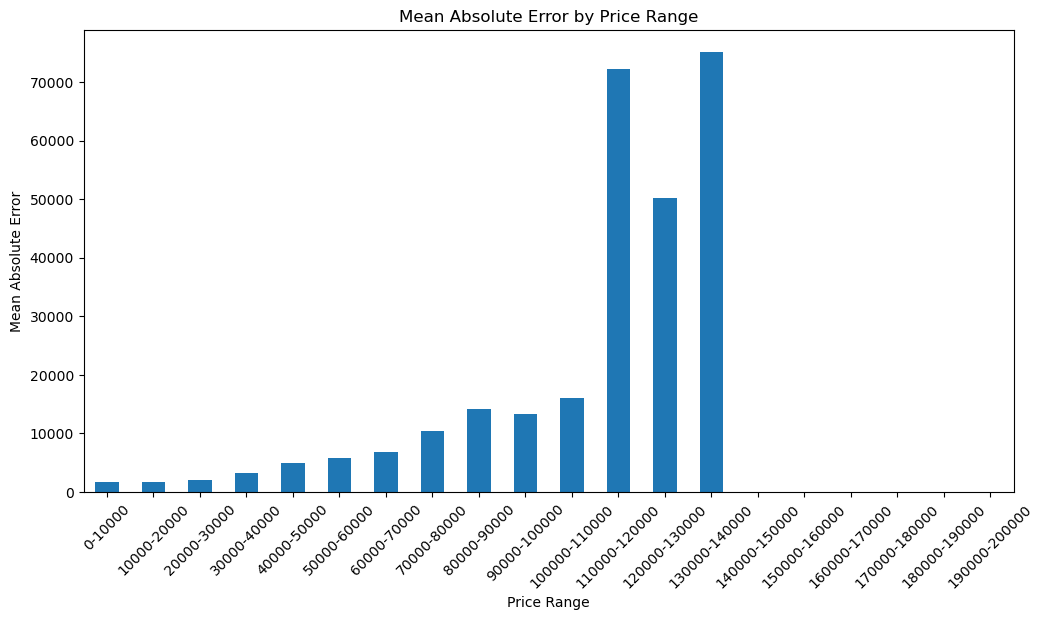

In [56]:
# Ensure y_test and errors are 1-dimensional
y_test = y_test.flatten()
errors = np.abs(y_test - y_pred_XG_rand_optimized).flatten()

# Create a DataFrame with actual prices and errors
Plot_df = pd.DataFrame({'Price': y_test, 'Error': errors})

# Define price bins (e.g., each $10k)
price_bins = np.arange(0, 210000, 10000)
labels = [f'{int(bin)}-{int(bin+10000)}' for bin in price_bins[:-1]]

# Bin the prices
Plot_df['Price Range'] = pd.cut(Plot_df['Price'], bins=price_bins, labels=labels, include_lowest=True)

# Calculate the mean error for each price range
mean_errors = Plot_df.groupby('Price Range')['Error'].mean()

# Plot the mean error for each price range
plt.figure(figsize=(12, 6))
mean_errors.plot(kind='bar')
plt.xlabel('Price Range')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error by Price Range')
plt.xticks(rotation=45)
plt.show()
